In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("./articulos_ml.csv")
data.shape

(161, 8)

In [5]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


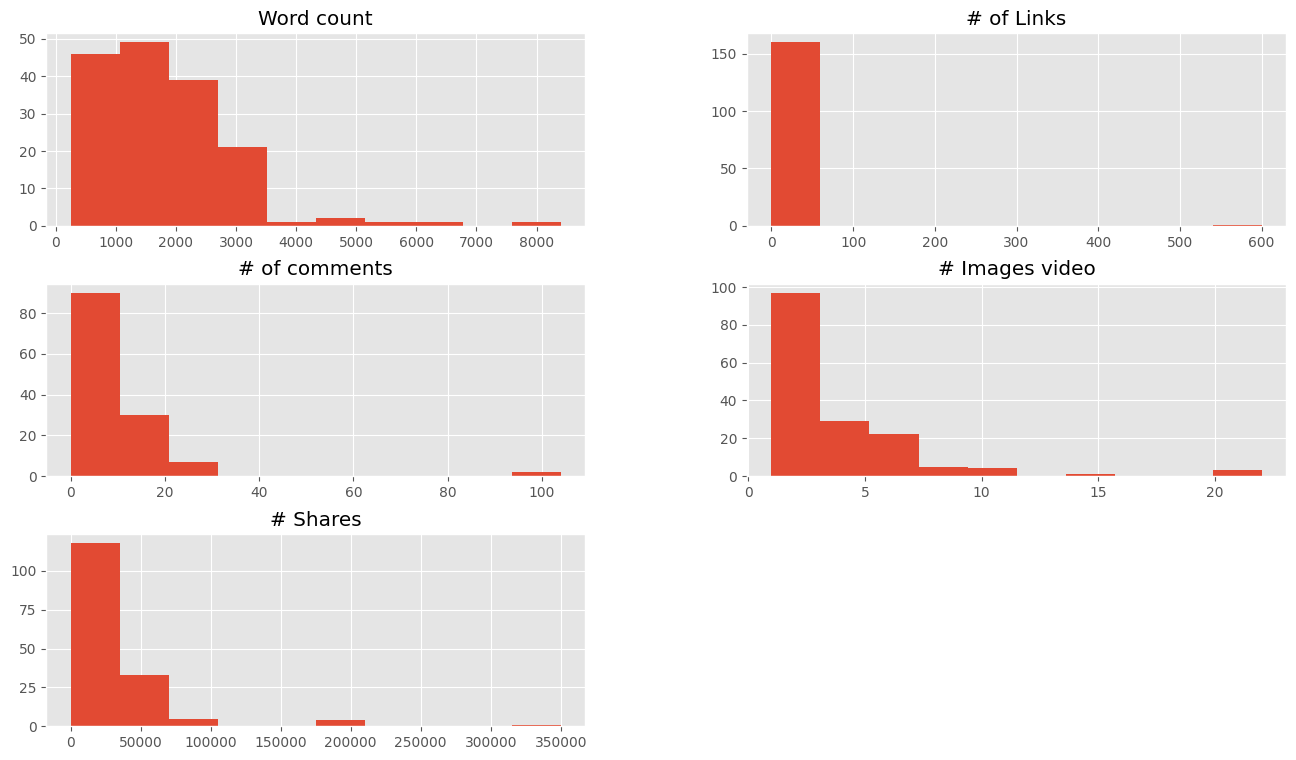

In [8]:
data.drop(['Title','url', 'Elapsed days'],axis=1).hist()
plt.show()

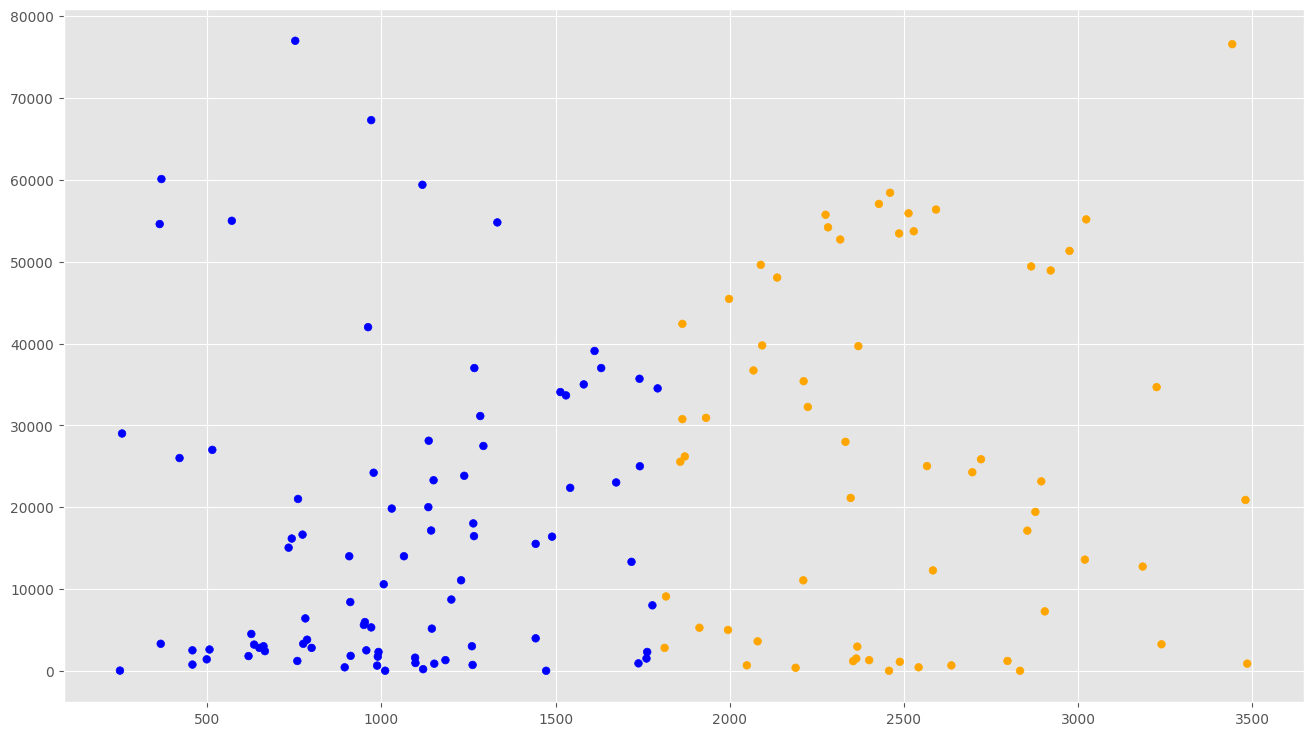

In [7]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [8]:
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


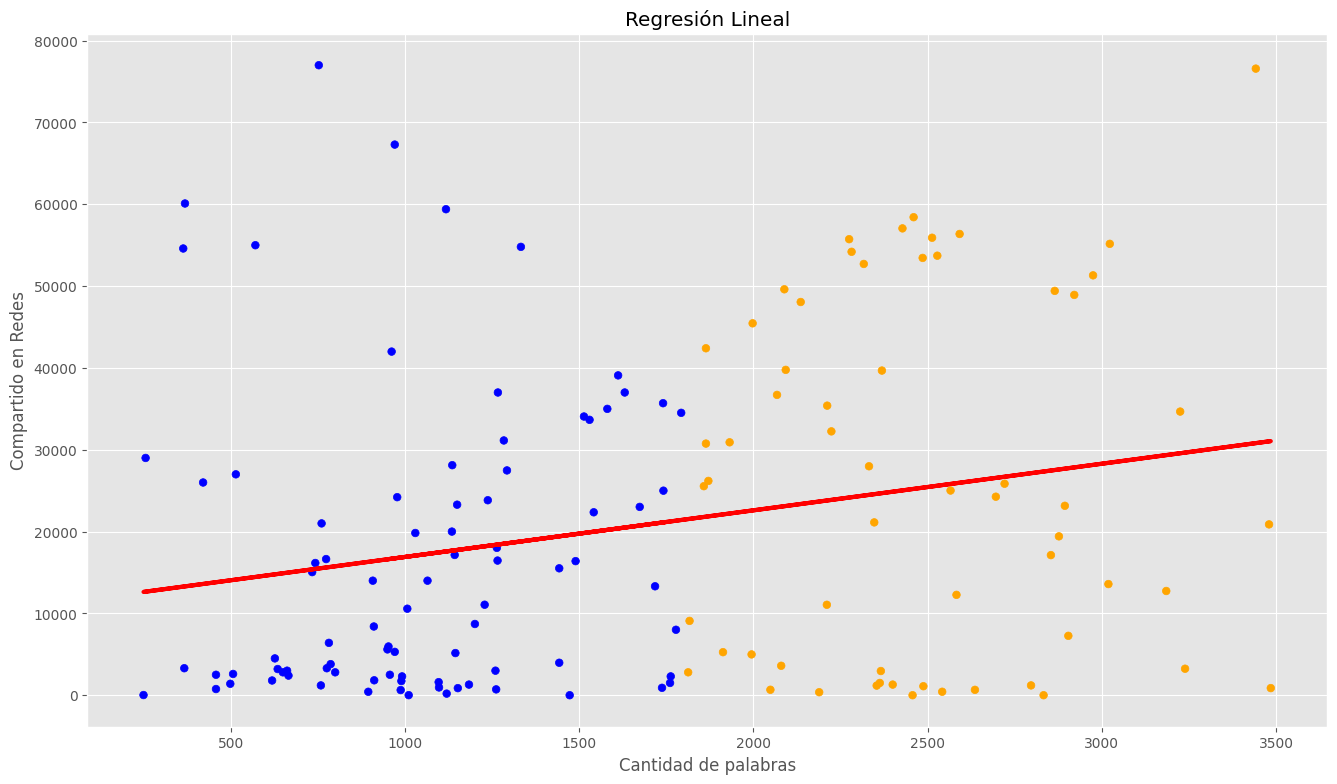

In [11]:
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.plot(f1, y_pred, color='red', linewidth=3)
#sns.regplot(x=f1, y=f2, data=data, scatter='false', color='red')
plt.title("Regresión Lineal")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Compartido en Redes")
plt.show()

In [12]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


C:\Users\mauor\AppData\Local\Temp\ipykernel_1528\452605552.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))
